In [1]:
from scipy.spatial.transform import Rotation
import numpy as np
import math

#import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def projection(K, R, T, Q):
    Projection_M = K @ (np.hstack((R,T)))
    q = Projection_M @ Q
    return q

In [3]:
K1 = np.array([ [1000, 0, 300], [0, 1000, 200], [0, 0, 1] ])
K2 = np.array([ [1000, 0, 300], [0, 1000, 200], [0, 0, 1] ])

R1 = np.array([ [1, 0, 0], [0, 1, 0], [0, 0, 1]])
t1 = np.array([ [0], [0], [0]])

R2 = Rotation.from_euler('xyz', [0.7, -0.5, 0.8]).as_matrix()
t2 = np.array([[0.2], [2], [1]])

# Ex 3.1

In [4]:
Q = np.array( [1, 0.5, 4, 1])
q1 = K1 @ np.hstack((R1, t1)) @ Q.T
q1 = q1[0:-1]/q1[-1]

q2 = K2 @ np.hstack((R2.T, -R2.T@t2)) @ Q.T
q2 = q2[0:-1]/q2[-1]
print('q1:{}\nq2:{} '.format(q1, q2))

q1:[550. 325.]
q2:[602.79314254 390.34824055] 


# Ex 3.2

In [5]:
def CrossOp(p):
    CP_matrix = np.array([ [0, -p[2], p[1]], [p[2], 0, -p[0]], [-p[1], p[0], 0]], dtype = 'float32')
    return CP_matrix

In [6]:
## Validation
p1 = np.array([4, 3, 6], dtype = 'float32')
p2 = np.array([1, -2, 9], dtype = 'float32')
func = CrossOp(p1) @ p2
val = np.cross(p1, p2)
print('CrossOp(p1) x p2:{}\np1 x p2:{}'.format(func, val))

CrossOp(p1) x p2:[ 39. -30. -11.]
p1 x p2:[ 39. -30. -11.]


# Ex 3.3

In [7]:
F = (np.linalg.inv(K2)).T @ (CrossOp(-R2.T@t2) @ R2.T) @ np.linalg.inv(K1)
verify = np.hstack((q2, 1)) @ F @ np.hstack((q1, 1))
print('Fundamental Matrix:\n', F)
print('(q2 @ F @ q1) = ', verify)

Fundamental Matrix:
 [[ 3.29311884e-07  5.15532586e-07 -1.29882761e-03]
 [ 8.19396348e-07 -8.76916007e-07  1.51951704e-03]
 [ 1.79162598e-03  9.31426807e-05 -1.10072684e+00]]
(q2 @ F @ q1) =  1.5791264074138667e-08


<ipython-input-5-5af63098a333>:2: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  CP_matrix = np.array([ [0, -p[2], p[1]], [p[2], 0, -p[0]], [-p[1], p[0], 0]], dtype = 'float32')


# Ex 3.4

In [8]:
l = F @ (np.hstack((q1, np.ones((1))))).T
verify = np.hstack((q2, 1)) @ l
print('Epipolar line:\n', l)
print('Verify: q2@l = ', verify)

Epipolar line:
 [-0.00095016  0.00168519 -0.08506118]
Verify: q2@l =  1.579126418516097e-08


# Ex 3.5

In [9]:
res = np.hstack((q2, np.ones(1))).T @ l.T
print(res)

1.579126418516097e-08


# Ex 3.6 and Ex 3.7

### in Notebook

# Ex 3.8

In [10]:
info = np.load('TwoImageData.npy', allow_pickle=True).item()
print(info)

{'im1': array([[17, 17, 14, ..., 19, 18, 20],
       [15, 16, 15, ..., 18, 17, 19],
       [14, 14, 15, ..., 18, 18, 21],
       ...,
       [13, 14, 16, ...,  4,  4,  5],
       [13, 13, 14, ...,  4,  5,  6],
       [12, 13, 14, ...,  6,  6,  5]], dtype=uint8), 'im2': array([[14, 15, 12, ..., 22, 20, 21],
       [13, 14, 14, ..., 21, 19, 20],
       [13, 12, 13, ..., 19, 20, 22],
       ...,
       [14, 19, 38, ...,  5,  5,  6],
       [27, 56, 90, ...,  5,  6,  7],
       [49, 76, 74, ...,  5,  7,  6]], dtype=uint8), 'R1': array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), 'R2': array([[ 9.97063888e-01,  1.21564307e-04,  7.65740684e-02],
       [-1.37753401e-04,  9.99999969e-01,  2.06135565e-04],
       [-7.65740409e-02, -2.16078666e-04,  9.97063874e-01]]), 't1': array([[0.],
       [0.],
       [0.]]), 't2': array([[-0.04594547],
       [-0.00017171],
       [ 0.00157051]]), 'K': array([[1.41448973e+03, 0.00000000e+00, 4.01393651e+02],
       [0.00000000e+00, 1.4142707

In [11]:
K1 = info['K']
K2 = info['K']
F = (np.linalg.inv(K2)).T @ (CrossOp(info['t2']) @ info['R2']) @ np.linalg.inv(K1)
print('Fundamental Matrix:\n', F)

Fundamental Matrix:
 [[ 6.67972386e-12 -7.85049965e-10  1.17921973e-07]
 [-9.75936932e-10 -4.86806496e-12  3.28699187e-05]
 [ 4.23506595e-07 -3.21704070e-05 -2.12002222e-04]]


<ipython-input-5-5af63098a333>:2: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  CP_matrix = np.array([ [0, -p[2], p[1]], [p[2], 0, -p[0]], [-p[1], p[0], 0]], dtype = 'float32')


# Ex 3.9

In [ ]:
def DrawLine(l, shape, shape_1):
    def in_frame(l_im):
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
            return q
    
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    plt.plot(*np.array(P).T + np.array([[shape_1[1]], [0]]))
    return P

img = np.hstack((info['im1'], info['im2']))
plt.imshow(img, cmap = 'gray')

p = plt.ginput(1)
q1 = np.array([[p[0][0]], [p[0][1]] ])
l = F @ np.vstack((q1, np.ones((1,1))))
P = DrawLine(l, info['im2'].shape, info['im1'].shape)
plt.show()

print('Epiplar line in img2:\n', l)
print('Verify: q2@l = ', np.hstack((P[0], 1)) @ l)



<ipython-input-12-41fc2f4af0b6>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p = plt.ginput(1)


# Ex 3.10

In [ ]:
def DrawLine(l, shape):
    def in_frame(l_im):
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
            return q
    
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    plt.plot(*np.array(P).T)
    return P

img = np.hstack((info['im1'], info['im2']))
plt.imshow(img, cmap = 'gray')

p = plt.ginput(1)
q2 = np.array([[p[0][0]-info['im1'].shape[1]], [p[0][1]] ])
l = F.T @ np.vstack((q2, np.ones((1,1))))
P = DrawLine(l, info['im1'].shape)
plt.show()

print('Epiplar line in img1:\n', l)
print('Verify: q1@l = ', np.hstack((P[0], 1)) @ l)




# Ex 3.11

In [12]:
def box3d(n):
    x_left_right = np.linspace(-0.5,0.5,n)
    y_left = -0.5 * np.ones(n)
    y_right = 0.5 * np.ones(n)
    z_bottom = -0.5 * np.ones(n)
    z_up = 0.5 * np.ones(n)
    left_right_surf = np.vstack((np.concatenate((x_left_right, x_left_right, x_left_right, x_left_right)), np.concatenate((y_left,y_left, y_right, y_right)), np.concatenate((z_bottom, z_up, z_bottom, z_up))))
    
    x_front = -0.5 * np.ones(n)
    x_back = 0.5 * np.ones(n)
    y_front_back = np.linspace(-0.5, 0.5, n)
    front_back_surf = np.vstack((np.concatenate((x_front, x_front, x_back, x_back)), np.concatenate((y_front_back, y_front_back, y_front_back, y_front_back)), np.concatenate((z_bottom, z_up, z_bottom, z_up))))
    
    z_bottom2top = np.linspace(-0.5,0.5,n)
    around = np.vstack((np.concatenate((x_front, x_front, x_back, x_back)), np.concatenate((y_left, y_right, y_right, y_left)), np.concatenate((z_bottom2top, z_bottom2top, z_bottom2top, z_bottom2top))))
    
    x_center = np.zeros(n)
    y_center = np.linspace(-0.5,0.5,n)
    y_center1 = np.zeros(n)
    z_center = np.zeros(n)
    center = np.vstack((np.concatenate((x_center, x_left_right, x_center)), np.concatenate((y_center, y_center1, y_center1)), np.concatenate((z_center, z_center, z_bottom2top))))
    
    return np.hstack((left_right_surf, front_back_surf, around, center))

In [111]:
def triangulate(q, P):
    B = []
    for i, p in zip(q,P):
        a1 = p[2][0] * i[0] - p[0][0] 
        a2 = p[2][1] * i[0] - p[0][1]
        a3 = p[2][2] * i[0] - p[0][2]
        a4 = p[2][3] * i[0] - p[0][3]
        a = (a1, a2, a3, a4)
        B.append(a)
        b1 = p[2][0] * i[1] - p[1][0] 
        b2 = p[2][1] * i[1] - p[1][1]
        b3 = p[2][2] * i[1] - p[1][2]
        b4 = p[2][3] * i[1] - p[1][3]
        b = (b1, b2, b3, b4)
        B.append(b)
    B = np.array(B).reshape(-1, 4)
    U, S, V = np.linalg.svd(B)
    B = V[-1, :]
    return B
        

In [112]:
K1 = np.array([ [1000, 0, 300], [0, 1000, 200], [0, 0, 1] ])
K2 = np.array([ [1000, 0, 300], [0, 1000, 200], [0, 0, 1] ])

R1 = np.array([ [1, 0, 0], [0, 1, 0], [0, 0, 1]])
t1 = np.array([ [0], [0], [4]])

R2 = Rotation.from_euler('xyz', [0.5, 0.3, 0.3]).as_matrix()
t2 = np.array([[0], [0.8], [7]])

R3 = Rotation.from_euler('xyz', [0, 0.1, 0.4]).as_matrix()
t3 = np.array([[-1], [0], [6]])


Q = box3d(30)
Q = np.vstack((Q, np.ones((1, Q.shape[1]))))
P1 = K1 @ np.hstack((R1, t1))
q1 = K1 @ np.hstack((R1, t1)) @ Q
q1 = q1[:-1]/q1[-1]

P2 = K2 @ np.hstack((R2 ,t2))
q2 = K2 @ np.hstack((R2 ,t2)) @ Q
q2 = q2[:-1]/q2[-1]

P3 = K2 @ np.hstack((R3 ,t3))
q3 = K2 @ np.hstack((R3 ,t3)) @ Q
q3 = q3[:-1]/q3[-1]

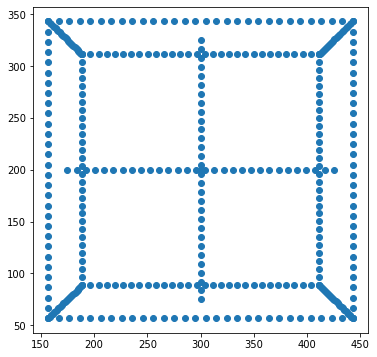

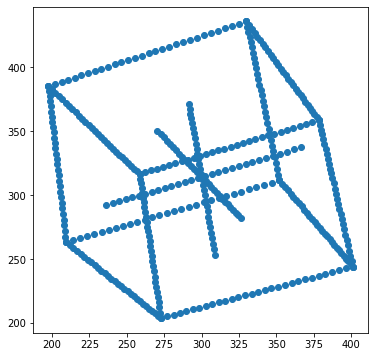

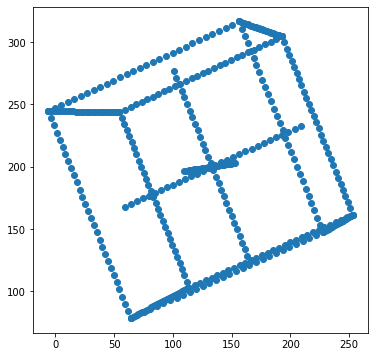

In [113]:
plt.figure(figsize=(6,6))
plt.scatter(q1[0,:], q1[1,:])

plt.figure(figsize=(6,6))
plt.scatter(q2[0,:], q2[1,:])


plt.figure(figsize=(6,6))
plt.scatter(q3[0,:], q3[1,:])

In [114]:
P = [P1, P2, P3]
Triangulate_Points = []
for i in range(q1.shape[1]):
    q = [q1[:,i], q2[:,i], q3[:,i]]
    Q = triangulate(q, P)
    Q = Q[:-1]/Q[-1]
    Triangulate_Points.append(Q)

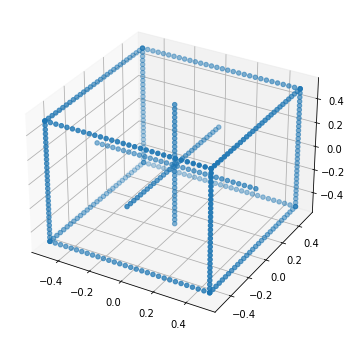

In [115]:
Triangulate_Points = np.array(Triangulate_Points)
x = Triangulate_Points[:,0]
y = Triangulate_Points[:,1]
z = Triangulate_Points[:,2]
plt.figure(figsize=(6,6))
ThreeD_img = plt.axes(projection = '3d')
ThreeD_img.scatter3D(x,y,z)
plt.show()

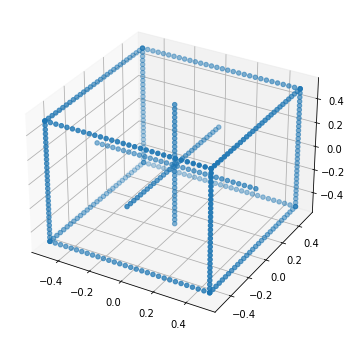

In [116]:
x,y,z = box3d(30)
plt.figure(figsize=(6,6))
ThreeD_img = plt.axes(projection = '3d')
ThreeD_img.scatter3D(x,y,z)
plt.show()